# TP D'ANALYSE DE DONNEES

## TRAVAIL REALISE PAR DINA BOULIL ET EDNIE LAFLEUR

Nous avons eu une base de données à partir de laquelle nous devions faire une typologie des villes. Et pour cela, nous avons choisi l'Analyse en Composantes Principales (ACP) car cette méthode nous parait la plus appropriée compte tenu du fait que notre base contientun nombre non négligeable de variables (34 variables).

Par ailleurs, s'agissant de données concernant la pluviométrie, nous avons jugé pertinent de faire une caractérisation à l'aide des variables de l'étude et donc il a fallu recourir à une méthode d'analyse multivariée, l'ACP. Il faut souligner que cette méthode nous permet de réduire le nombre de variables et de rendre l'information moins redondante.

In [1]:
#Nous commençons par importer les librairies dont nous aurons besoin dans le notebook
import pandas as pd
import sklearn as sl
import matplotlib.pylab as plt
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings(action="ignore")

#Chargement de la base de données de Pluviométrie 
df = pd.read_csv("Pluviometrie_villes_france.csv", delimiter = ";", encoding='latin-1',header= 0, index_col=0) 
df


JANVIERp  FEVRIERp  MARSp  AVRILp   MAIp  JUINp  \
Ajaccio                           78.0      69.0   51.0    39.0   43.0   23.0   
Angers                            65.0      50.0   60.0    45.0   50.0   55.0   
Angoulème                         79.0      68.0   64.0    62.0   70.0   58.0   
Besançon                          94.0      87.0   75.0    74.0   86.0  107.0   
Biarritz                         128.0     105.0   98.0   102.0  100.0   91.0   
Bordeaux                         100.0      84.0   66.0    57.0   64.0   71.0   
Brest                            130.0      98.0   89.0    77.0   74.0   60.0   
Caen                              65.0      61.0   45.0    44.0   53.0   52.0   
Clermont-Fd                       28.0      27.0   30.0    41.0   78.0   79.0   
Dijon                             62.0      48.0   51.0    48.0   68.0   79.0   
Embrun                            61.0      55.0   55.0    48.0   47.0   63.0   
Grenoble                          80.0      79.0   69.0    69.0   83.0   94.0   
Lille                             45.0      43.0   38.0    37.0   45.0   57.0   
Limoges                           87.0      75.0   68.0    69.0   72.0   71.0   
Lyon                              53.0      50.0   60.0    54.0   67.0   84.0   
Marseille                         36.0      49.0   40.0    35.0   38.0   33.0   
Montpellier                       56.0      59.0   69.0    46.0   47.0   41.0   
Nancy                             66.0      58.0   43.0    45.0   62.0   70.0   
Nantes                            83.0      65.0   53.0    48.0   54.0   52.0   
Nice                              67.0      83.0   71.0    70.0   39.0   37.0   
Nîmes                             52.0      53.0   57.0    45.0   50.0   40.0   
Orléans                           57.0      48.0   43.0    46.0   52.0   54.0   
Paris                             53.0      48.0   40.0    45.0   53.0   57.0   
Perpignan                         27.0      52.0   59.0    47.0   49.0   33.0   
Poitiers                          65.0      58.0   56.0    49.0   55.0   55.0   
Reims                             43.0      44.0   42.0    37.0   52.0   53.0   
Rennes                            57.0      50.0   45.0    43.0   46.0   48.0   
Rouen                             65.0      58.0   50.0    44.0   50.0   57.0   
St-Quentin                        52.0      50.0   46.0    44.0   52.0   63.0   
Strasbourg                        51.0      44.0   42.0    58.0   71.0   88.0   
Toulon                            76.0      86.0   82.0    60.0   49.0   35.0   
Toulouse                          53.0      50.0   52.0    55.0   65.0   65.0   
Tours                             63.0      55.0   52.0    51.0   53.0   58.0   
Vichy                             50.0      45.0   51.0    52.0   84.0   84.0   
NaN                                NaN       NaN    NaN     NaN    NaN    NaN   
NaN                                NaN       NaN    NaN     NaN    NaN    NaN   
p=pluviométrie                     NaN       NaN    NaN     NaN    NaN    NaN   
nb.j.pl=nb de jours de pluie       NaN       NaN    NaN     NaN    NaN    NaN   

                              JUILLETp  AOUTp  SEPTEMBREp  OCTOBREp  ...  \
Ajaccio                           10.0   15.0        43.0      81.0  ...   
Angers                            35.0   60.0        55.0      65.0  ...   
Angoulème                         53.0   66.0        69.0      70.0  ...   
Besançon                          80.0  116.0       106.0      78.0  ...   
Biarritz                          69.0  123.0       155.0     152.0  ...   
Bordeaux                          52.0   65.0        88.0      84.0  ...   
Brest                             51.0   80.0        95.0     108.0  ...   
Caen                              45.0   57.0        66.0      75.0  ...   
Clermont-Fd                       48.0   70.0        58.0      43.0  ...   
Dijon                             44.0   79.0        74.0      53.0  ...   
Embrun                            

In [2]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Taille de la matrice df 
df.shape

(38, 34)

In [4]:
# Suppression des quatre dernières lignes parasites
df=df.dropna()
df


JANVIERp  FEVRIERp  MARSp  AVRILp   MAIp  JUINp  JUILLETp  AOUTp  \
Ajaccio          78.0      69.0   51.0    39.0   43.0   23.0      10.0   15.0   
Angers           65.0      50.0   60.0    45.0   50.0   55.0      35.0   60.0   
Angoulème        79.0      68.0   64.0    62.0   70.0   58.0      53.0   66.0   
Besançon         94.0      87.0   75.0    74.0   86.0  107.0      80.0  116.0   
Biarritz        128.0     105.0   98.0   102.0  100.0   91.0      69.0  123.0   
Bordeaux        100.0      84.0   66.0    57.0   64.0   71.0      52.0   65.0   
Brest           130.0      98.0   89.0    77.0   74.0   60.0      51.0   80.0   
Caen             65.0      61.0   45.0    44.0   53.0   52.0      45.0   57.0   
Clermont-Fd      28.0      27.0   30.0    41.0   78.0   79.0      48.0   70.0   
Dijon            62.0      48.0   51.0    48.0   68.0   79.0      44.0   79.0   
Embrun           61.0      55.0   55.0    48.0   47.0   63.0      41.0   65.0   
Grenoble         80.0      79.0   69.0    69.0   83.0   94.0      74.0   96.0   
Lille            45.0      43.0   38.0    37.0   45.0   57.0      62.0   64.0   
Limoges          87.0      75.0   68.0    69.0   72.0   71.0      56.0   73.0   
Lyon             53.0      50.0   60.0    54.0   67.0   84.0      55.0  104.0   
Marseille        36.0      49.0   40.0    35.0   38.0   33.0      13.0   27.0   
Montpellier      56.0      59.0   69.0    46.0   47.0   41.0      20.0   52.0   
Nancy            66.0      58.0   43.0    45.0   62.0   70.0      58.0   76.0   
Nantes           83.0      65.0   53.0    48.0   54.0   52.0      42.0   66.0   
Nice             67.0      83.0   71.0    70.0   39.0   37.0      21.0   38.0   
Nîmes            52.0      53.0   57.0    45.0   50.0   40.0      25.0   40.0   
Orléans          57.0      48.0   43.0    46.0   52.0   54.0      47.0   54.0   
Paris            53.0      48.0   40.0    45.0   53.0   57.0      54.0   61.0   
Perpignan        27.0      52.0   59.0    47.0   49.0   33.0      27.0   28.0   
Poitiers         65.0      58.0   56.0    49.0   55.0   55.0      46.0   59.0   
Reims            43.0      44.0   42.0    37.0   52.0   53.0      47.0   58.0   
Rennes           57.0      50.0   45.0    43.0   46.0   48.0      36.0   57.0   
Rouen            65.0      58.0   50.0    44.0   50.0   57.0      49.0   67.0   
St-Quentin       52.0      50.0   46.0    44.0   52.0   63.0      61.0   69.0   
Strasbourg       51.0      44.0   42.0    58.0   71.0   88.0      73.0   90.0   
Toulon           76.0      86.0   82.0    60.0   49.0   35.0      12.0   31.0   
Toulouse         53.0      50.0   52.0    55.0   65.0   65.0      44.0   43.0   
Tours            63.0      55.0   52.0    51.0   53.0   58.0      47.0   60.0   
Vichy            50.0      45.0   51.0    52.0   84.0   84.0      63.0   86.0   

             SEPTEMBREp  OCTOBREp  ...  DECEMBREnb.j.pl  \
Ajaccio            43.0      81.0  ...             13.0   
Angers             55.0      65.0  ...             16.0   
Angoulème          69.0      70.0  ...             16.0   
Besançon          106.0      78.0  ...             15.0   
Biarritz          155.0     152.0  ...             17.0   
Bordeaux           88.0      84.0  ...             17.0   
Brest              95.0     108.0  ...             22.0   
Caen               66.0      75.0  ...             17.0   
Clermont-Fd        58.0      43.0  ...             12.0   
Dijon              74.0      53.0  ...             14.0   
Embrun             60.0      60.0  ...             10.0   
Grenoble           88.0      85.0  ...             14.0   
Lille              53.0      56.0  ...             17.0   
Limoges            87.0      72.0  ...             17.0   
Lyon               86.0      73.0  ...             14.0   
Marseille          65.0      67.0  ...             10.0   
Montpellier        78.0     125.0  ...             10.0   
Nancy              65.0      52.0  ...             16.0   
Nantes             80.0      77.0  ...             18.0 

## Choix des variables actives
Avant de réaliser l'ACP, nous devons choisir les variables actives, c'est-à-dire celles qui vont servir à calculer les distances entre individus et qui permettront de construire les axes. Nous avons ciblé comme variables actives, le volume des précipitations pour les 12 mois de l'année (pluviométrie), le nombre de jours de pluie pour les 12 mois de l'année, les précipitations annuelles, le nombre annuel de jours de pluie, la température annuelle moyenne, les précipitations de mai à aout,les précipitations de sept-oct, l'amplitude annuelle moyenne et l'insolation annuelle.

Nous espérons faire une classification des villes suivant les mois les plus secs et les plus humides de l'année. 

Nous avons gardé à la fois les données mensuelles et les données annuelles ("Précipitations annuelles" et "Nombre annuel de jours de pluie") car, avec ces deux types de données, l'information restituée par le premier axe est plus grande (52%) que si nous ne considérions que les données mensuelles d'un coté ou celles annuelles de l'autre (à peu près 46 % pour ces deux derniers cas). Nous ne craignons pas que la redondance de l'information entre les valeurs mensuelles et annuelles constitue un problème car justement l'ACP permet de rendre l'information contenue dans les variables moins redondante.

Les autres variables quant à elles ne serviront pas à construire les axes mais serviront à interpreter ces dernières dans une analyse ultérieure. Ce sont la latitude, la longitude et la géographie.

In [5]:
# Eliminons les colonnes "Latitude", "Longitude" et "Géographie"
df.drop(columns=["Latitude", "Longitude", "Géographie"],inplace=True)
df


JANVIERp  FEVRIERp  MARSp  AVRILp   MAIp  JUINp  JUILLETp  AOUTp  \
Ajaccio          78.0      69.0   51.0    39.0   43.0   23.0      10.0   15.0   
Angers           65.0      50.0   60.0    45.0   50.0   55.0      35.0   60.0   
Angoulème        79.0      68.0   64.0    62.0   70.0   58.0      53.0   66.0   
Besançon         94.0      87.0   75.0    74.0   86.0  107.0      80.0  116.0   
Biarritz        128.0     105.0   98.0   102.0  100.0   91.0      69.0  123.0   
Bordeaux        100.0      84.0   66.0    57.0   64.0   71.0      52.0   65.0   
Brest           130.0      98.0   89.0    77.0   74.0   60.0      51.0   80.0   
Caen             65.0      61.0   45.0    44.0   53.0   52.0      45.0   57.0   
Clermont-Fd      28.0      27.0   30.0    41.0   78.0   79.0      48.0   70.0   
Dijon            62.0      48.0   51.0    48.0   68.0   79.0      44.0   79.0   
Embrun           61.0      55.0   55.0    48.0   47.0   63.0      41.0   65.0   
Grenoble         80.0      79.0   69.0    69.0   83.0   94.0      74.0   96.0   
Lille            45.0      43.0   38.0    37.0   45.0   57.0      62.0   64.0   
Limoges          87.0      75.0   68.0    69.0   72.0   71.0      56.0   73.0   
Lyon             53.0      50.0   60.0    54.0   67.0   84.0      55.0  104.0   
Marseille        36.0      49.0   40.0    35.0   38.0   33.0      13.0   27.0   
Montpellier      56.0      59.0   69.0    46.0   47.0   41.0      20.0   52.0   
Nancy            66.0      58.0   43.0    45.0   62.0   70.0      58.0   76.0   
Nantes           83.0      65.0   53.0    48.0   54.0   52.0      42.0   66.0   
Nice             67.0      83.0   71.0    70.0   39.0   37.0      21.0   38.0   
Nîmes            52.0      53.0   57.0    45.0   50.0   40.0      25.0   40.0   
Orléans          57.0      48.0   43.0    46.0   52.0   54.0      47.0   54.0   
Paris            53.0      48.0   40.0    45.0   53.0   57.0      54.0   61.0   
Perpignan        27.0      52.0   59.0    47.0   49.0   33.0      27.0   28.0   
Poitiers         65.0      58.0   56.0    49.0   55.0   55.0      46.0   59.0   
Reims            43.0      44.0   42.0    37.0   52.0   53.0      47.0   58.0   
Rennes           57.0      50.0   45.0    43.0   46.0   48.0      36.0   57.0   
Rouen            65.0      58.0   50.0    44.0   50.0   57.0      49.0   67.0   
St-Quentin       52.0      50.0   46.0    44.0   52.0   63.0      61.0   69.0   
Strasbourg       51.0      44.0   42.0    58.0   71.0   88.0      73.0   90.0   
Toulon           76.0      86.0   82.0    60.0   49.0   35.0      12.0   31.0   
Toulouse         53.0      50.0   52.0    55.0   65.0   65.0      44.0   43.0   
Tours            63.0      55.0   52.0    51.0   53.0   58.0      47.0   60.0   
Vichy            50.0      45.0   51.0    52.0   84.0   84.0      63.0   86.0   

             SEPTEMBREp  OCTOBREp  ...  SEPTEMBREnb.j.pl  OCTOBREnb.j.pl  \
Ajaccio            43.0      81.0  ...               6.0            10.0   
Angers             55.0      65.0  ...              12.0            13.0   
Angoulème          69.0      70.0  ...              12.0            13.0   
Besançon          106.0      78.0  ...              13.0            14.0   
Biarritz          155.0     152.0  ...              14.0            15.0   
Bordeaux           88.0      84.0  ...              13.0            14.0   
Brest              95.0     108.0  ...              16.0            19.0   
Caen               66.0      75.0  ...              13.0            15.0   
Clermont-Fd        58.0      43.0  ...              10.0            11.0   
Dijon              74.0      53.0  ...              11.0            12.0   
Embrun             60.0      60.0  ...               8.0             9.0   
Grenoble           88.0      85.0  ...              11.0            12.0   
Lille              53.0      56.0  ...              14.0            14.0   
Limoges            87.0      72.0  ...              12.0            14.0   
Lyon               86.0      73.0  ..

In [6]:
#Statistiques descriptives 
df.describe()

JANVIERp    FEVRIERp      MARSp      AVRILp        MAIp       JUINp  \
count   34.000000   34.000000  34.000000   34.000000   34.000000   34.000000   
mean    65.500000   60.411765  56.235294   52.529412   59.441176   60.794118   
std     23.187314   17.472260  15.113828   13.918018   14.902087   19.487027   
min     27.000000   27.000000  30.000000   35.000000   38.000000   23.000000   
25%     52.250000   49.250000  45.000000   44.250000   49.250000   52.000000   
50%     62.500000   55.000000  52.500000   48.000000   53.000000   57.500000   
75%     77.500000   68.750000  65.500000   57.750000   69.500000   71.000000   
max    130.000000  105.000000  98.000000  102.000000  100.000000  107.000000   

        JUILLETp       AOUTp  SEPTEMBREp    OCTOBREp  ...  SEPTEMBREnb.j.pl  \
count  34.000000   34.000000   34.000000   34.000000  ...         34.000000   
mean   45.882353   64.558824   71.441176   73.058824  ...         11.058824   
std    17.750399   24.017911   20.682581   25.254992  ...          2.773699   
min    10.000000   15.000000   43.000000   43.000000  ...          5.000000   
25%    37.250000   54.750000   57.250000   54.250000  ...         10.000000   
50%    47.000000   64.500000   68.000000   68.500000  ...         12.000000   
75%    55.750000   75.250000   79.500000   83.250000  ...         13.000000   
max    80.000000  123.000000  155.000000  152.000000  ...         16.000000   

       OCTOBREnb.j.pl  NOVEMBREnb.j.pl  DECEMBREnb.j.pl  \
count       34.000000        34.000000        34.000000   
mean        12.382353        13.588235        14.705882   
std          2.462011         2.996135         3.060297   
min          8.000000         6.000000         9.000000   
25%         11.000000        12.000000        13.250000   
50%         13.000000        15.000000        16.000000   
75%         14.000000        15.000000        16.750000   
max         19.000000        20.000000        22.000000   

       Nombre annuel de jours de pluie  Température moyenne annuelle  \
count                        34.000000                     34.000000   
mean                        143.735294                     11.686176   
std                          33.355122                      1.800037   
min                          76.000000                      9.490000   
25%                         133.250000                     10.462500   
50%                         157.500000                     11.155000   
75%                         165.000000                     13.167500   
max                         201.000000                     15.280000   

       Amplitude annuelle des températures  Insolation annuelle  \
count                            34.000000            34.000000   
mean                             15.773529          2066.705882   
std                               2.008363           401.788164   
min                              10.200000          1633.000000   
25%                              14.550000          1802.750000   
50%                              15.700000          1900.000000   
75%                              17.400000          2095.250000   
max                              18.600000          2917.000000   

       Précipitations de mai à aout  Précipitations sept-oct  
count                     34.000000                34.000000  
mean                      30.400000                35.594118  
std                        8.028548                 5.310877  
min                       13.900000                25.800000  
25%                       26.125000                32.125000  
50%                       30.750000                34.600000  
75%                       36.025000                37.325000  
max                       48.200000                51.300000  

[8 rows x 31 columns]

Nous constatons que dans notre jeu de données, la moyenne de la variable "Nombre annuel de jour de pluie" est de pratiquement 144 jours, la moyenne de la "Température moyenne annuelle" est de de 11.7 degré.

In [7]:
#Nombre d'observations
n = df.shape[0]
#Nombre de variables
p = df.shape[1]
df.head(5)

JANVIERp  FEVRIERp  MARSp  AVRILp   MAIp  JUINp  JUILLETp  AOUTp  \
Ajaccio        78.0      69.0   51.0    39.0   43.0   23.0      10.0   15.0   
Angers         65.0      50.0   60.0    45.0   50.0   55.0      35.0   60.0   
Angoulème      79.0      68.0   64.0    62.0   70.0   58.0      53.0   66.0   
Besançon       94.0      87.0   75.0    74.0   86.0  107.0      80.0  116.0   
Biarritz      128.0     105.0   98.0   102.0  100.0   91.0      69.0  123.0   

           SEPTEMBREp  OCTOBREp  ...  SEPTEMBREnb.j.pl  OCTOBREnb.j.pl  \
Ajaccio          43.0      81.0  ...               6.0            10.0   
Angers           55.0      65.0  ...              12.0            13.0   
Angoulème        69.0      70.0  ...              12.0            13.0   
Besançon        106.0      78.0  ...              13.0            14.0   
Biarritz        155.0     152.0  ...              14.0            15.0   

           NOVEMBREnb.j.pl  DECEMBREnb.j.pl  Nombre annuel de jours de pluie  \
Ajaccio               11.0             13.0                             95.0   
Angers                15.0             16.0                            154.0   
Angoulème             15.0             16.0                            160.0   
Besançon              15.0             15.0                            169.0   
Biarritz              16.0             17.0                            177.0   

           Température moyenne annuelle  Amplitude annuelle des températures  \
Ajaccio                           14.71                                 14.5   
Angers                            11.28                                 14.5   
Angoulème                         12.02                                 14.9   
Besançon                          10.04                                 17.6   
Biarritz                          13.58                                 12.3   

           Insolation annuelle  Précipitations de mai à aout  \
Ajaccio                 2811.0                          13.9   
Angers                  1899.0                          29.0   
Angoulème               1989.0                          29.9   
Besançon                1897.0                          35.8   
Biarritz                1921.0                          26.0   

           Précipitations sept-oct  
Ajaccio                       25.8  
Angers                        30.8  
Angoulème                     31.0  
Besançon                      35.5  
Biarritz                      36.8  

[5 rows x 31 columns]

Les données étant exprimées dans des unités différentes, nous avons intérêt à réaliser une ACP normée. Pour cela nous allons retrancher la moyenne à chaque variable puis la diviser par son écart type.

In [8]:
#Instanciation
sc = StandardScaler()

#Transformation – centrage-réduction
Z = sc.fit_transform(df)
Z = pd.DataFrame(Z)
Z.head(5)

0         1         2         3         4         5         6   \
0  0.547195  0.498927 -0.351600 -0.986697 -1.119872 -1.968616 -2.051896   
1 -0.021888 -0.604864  0.252836 -0.549119 -0.643075 -0.301803 -0.622296   
2  0.590971  0.440833  0.521474  0.690688  0.719202 -0.145540  0.407015   
3  1.247604  1.544625  1.260230  1.565846  1.809024  2.406768  1.950983   
4  2.735975  2.590322  2.804900  3.607881  2.762617  1.573361  1.321959   

         7         8         9   ...        21        22        23        24  \
0 -2.094442 -1.395807  0.319169  ... -1.851283 -0.982197 -0.876849 -0.565807   
1 -0.192664 -0.806883 -0.323897  ...  0.344425  0.254644  0.478281  0.429233   
2  0.060907 -0.119806 -0.122939  ...  0.344425  0.254644  0.478281  0.429233   
3  2.173993  1.696042  0.198594  ...  0.710376  0.666924  0.478281  0.097553   
4  2.469825  4.100814  3.172772  ...  1.076327  1.079204  0.817064  0.760912   

         25        26        27        28        29        30  
0 -1.483076  1.705130 -0.643649  1.880312 -2.086073 -1.871895  
1  0.312368 -0.229042 -0.643649 -0.423676 -0.177000 -0.916273  
2  0.494956  0.188243 -0.441487 -0.196309 -0.063214 -0.878048  
3  0.768837 -0.928277  0.923109 -0.428728  0.682715 -0.017988  
4  1.012287  1.067924 -1.755542 -0.368097 -0.556286  0.230474  

[5 rows x 31 columns]

In [9]:
# Nous vérifions que les variables sont de moyennes nulles aux erreurs de troncature près.
Z.mean(axis=0)

0    -6.530724e-18
1    -8.163405e-17
2     1.469413e-17
3    -1.155122e-16
4     2.481675e-16
5    -1.632681e-16
6    -3.918434e-17
7    -1.730642e-16
8     8.979745e-17
9    -1.371452e-16
10   -1.926563e-16
11    2.742904e-16
12   -1.736764e-16
13    1.240837e-16
14   -2.612289e-17
15    3.983741e-16
16   -2.285753e-17
17    3.591898e-16
18   -1.338798e-16
19    2.089832e-16
20   -2.285753e-17
21    1.142877e-16
22   -1.632681e-16
23    7.510332e-17
24    2.873518e-16
25   -3.951088e-16
26   -7.183796e-16
27    9.077706e-16
28    4.636814e-16
29   -7.510332e-16
30    1.475944e-15
dtype: float64

In [10]:
# Nous vérifions que les écarts-type sont unitaires.
Z.std(axis=0,ddof=0)

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
28    1.0
29    1.0
30    1.0
dtype: float64

 Après avoir centré et réduit notre matrice originale df, nous pouvons maintenant procéder à l'ACP 

In [117]:
#Instanciation
acp = PCA(svd_solver='full')

#Affichage de paramètres
acp



PCA(svd_solver='full')

In [118]:
#Calculs
coord = acp.fit_transform(Z)
#nombre de composantes calculées
print(acp.n_components_)

31


Nous obtenons ainsi le nombre de composantes principales, aussi appelés facteurs ou axes factoriels. Ici, nous avons 31 composantes principales, et on vérifie bien que le nombre de variables (p) est égal au nombre de composantes principales.

Nous allons nous intéresser à présent à l'information restituée par les axes dans l'objectif de construire un ou plusieurs plans factoriels selon le nombre d'axes retenus. 

In [12]:
# Variance expliquée
acp.explained_variance_

array([1.68046803e+01, 8.72423475e+00, 3.69326470e+00, 9.19780120e-01,
       3.85429473e-01, 2.63543502e-01, 2.35366539e-01, 1.64677216e-01,
       1.45117417e-01, 1.19697644e-01, 1.04954294e-01, 6.48435020e-02,
       5.14048359e-02, 4.58588490e-02, 4.21963717e-02, 3.10772985e-02,
       2.71682923e-02, 2.43781274e-02, 2.19643379e-02, 1.95584875e-02,
       1.30361615e-02, 1.07011361e-02, 8.84876367e-03, 6.57351645e-03,
       5.03015119e-03, 3.00199151e-03, 1.99752905e-03, 6.93373277e-04,
       3.15243975e-04, 2.65428131e-30, 8.83153976e-32])

In [13]:
#Variance expliquée corrigée
val_p = (n-1)/n*acp.explained_variance_
val_p

array([1.63104250e+01, 8.46763961e+00, 3.58463927e+00, 8.92727763e-01,
       3.74093312e-01, 2.55792223e-01, 2.28443994e-01, 1.59833769e-01,
       1.40849258e-01, 1.16177125e-01, 1.01867403e-01, 6.29363401e-02,
       4.98929290e-02, 4.45100594e-02, 4.09553020e-02, 3.01632603e-02,
       2.63692248e-02, 2.36611237e-02, 2.13183279e-02, 1.89832378e-02,
       1.26527449e-02, 1.03863968e-02, 8.58850592e-03, 6.38017773e-03,
       4.88220556e-03, 2.91369764e-03, 1.93877820e-03, 6.72979945e-04,
       3.05972093e-04, 2.57621422e-30, 8.57178859e-32])

Le pourcentage de variance expliquée nous indique la part de l'information restituée par les axes. Plus la somme des pourcentages de variance des axes retenus est  proche de 100%, meilleure est notre analyse.

In [14]:
#Proportion de variance expliquée
acp.explained_variance_ratio_

array([5.26142742e-01, 2.73149665e-01, 1.15633525e-01, 2.87976698e-02,
       1.20675262e-02, 8.25136202e-03, 7.36916110e-03, 5.15592803e-03,
       4.54352445e-03, 3.74764920e-03, 3.28604527e-03, 2.03020452e-03,
       1.60944932e-03, 1.43580837e-03, 1.32113877e-03, 9.73008398e-04,
       8.50620156e-04, 7.63262054e-04, 6.87687998e-04, 6.12362511e-04,
       4.08153063e-04, 3.35045058e-04, 2.77048578e-04, 2.05812185e-04,
       1.57490502e-04, 9.39902465e-05, 6.25412323e-05, 2.17090305e-05,
       9.87006752e-06, 8.31036844e-32, 2.76509309e-33])

Nous observons que l'information apportée par les trois premiers axes est de 91.49%. Le premier axe retient 52.6% de l'information disponible, le deuxième, 27.3% et le troisième 11.5%. 
Nous allons utiliser dans un premier temps un graphique du pourcentage de variance expliquée pour visualiser l'information restituée par les axes. Et dans un second temps, nous utiliserons le critère du coude pour confirmer que le nombre d'axes à retenir est vraiment 3. 

In [15]:
# Liste des composantes principales
list_acp = ["CP1","CP2","CP3","CP4","CP5","CP6","CP7","CP8","CP9","CP10","CP11","CP12","CP13","CP14","CP15","CP16", "CP17","CP18","CP19","CP20","CP21","CP22","CP23","CP24", "CP25","CP26","CP27","CP28","CP29","CP30","CP31"]
df_acp = pd.DataFrame(list_acp, columns = ["ACP"])
df_acp['explained_variance'] = acp.explained_variance_

<AxesSubplot:xlabel='explained_variance', ylabel='ACP'>

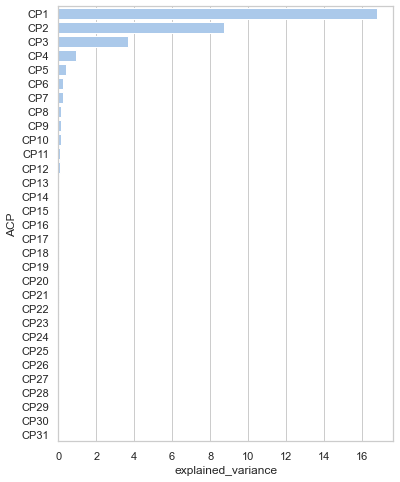

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialisons le graphique matplotlib
f, ax = plt.subplots(figsize=(6, 8))

# Histogramme variance expliquée
sns.set_color_codes("pastel")
sns.barplot(x='explained_variance', y="ACP", data=df_acp,
            label="Total", color="b")

Text(0.5, 0, 'Factor number')

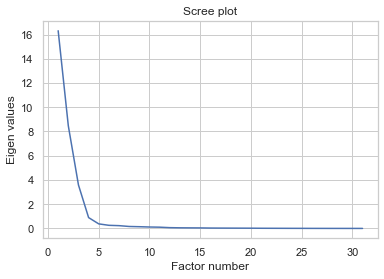

In [17]:
# Critère du coude
#scree plot
plt.plot(np.arange(1,p+1),val_p)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")

Les deux graphiques ci-dessus nous confirment ainsi que nous devons retenir les 3 premiers axes. 

Nous pouvons également avoir recours au graphique de variance expliquée cumulée pour décider du nombre d'axes à retenir. 

Text(0.5, 0, 'Factor number')

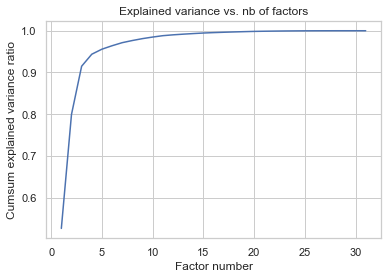

In [18]:
# Cumul de variance expliquée
plt.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. nb of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")

Effectivement, le nombre d'axes à retenir est de 3.

## REPRESENTATION DES INDIVIDUS

 Puisque nous avons trois axes nous devons représenter les indiviedus sur trois plans factoriels.
 
 Nous pourrons ainsi visualiser les proximités entre les indivius sur chaque plan factoriel.
 
 

### Représentation des individus dans le premier plan

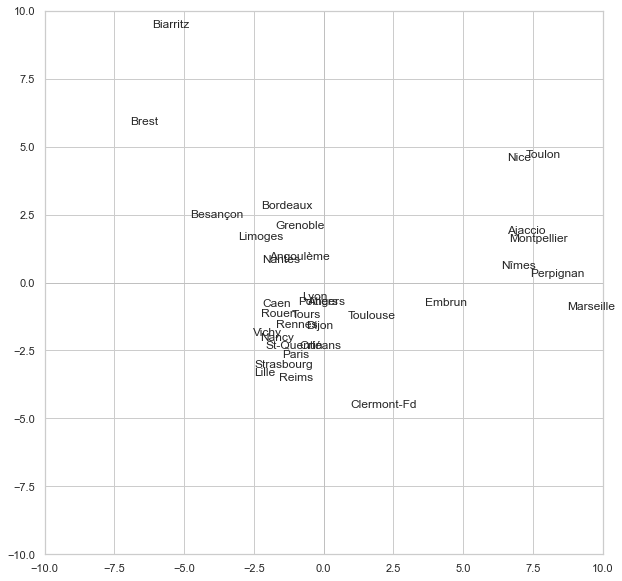

In [19]:
#Positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(10,10))
axes.set_xlim(-10,10) #même limites en abscisse
axes.set_ylim(-10,10) #et en ordonnée

#Placement des étiquettes des observations
for i in range(n):
    plt.annotate(df.index[i],(coord[i,0],coord[i,1]))
    
#Ajouter les axes
plt.plot([-10,10],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-10,10],color='silver',linestyle='-',linewidth=1)

Nous observons que les villes comme Ajaccio, Nimes, Montpellier, Perpignan, Nice, Toulon, Marseille sont très proches les unes des autres et très proche du premier axe factoriel et contribuent positivement à ce dernier.Nous remarquons également que les villes Nantes, Angoulème, Limoge, Grenoble, Bordeaux, Bansançon sont proche les unes des autres et contribuent négtivement au premier axe factoriel mais positivement au deuxième. Enfin les villes comme Caen, Lyon, Reims forment un troisième groupe qui contribuent négativement à l'axe un et deux. Nous observons ainsi un effet forme.

### Représentation des individus dans le deuxième plan

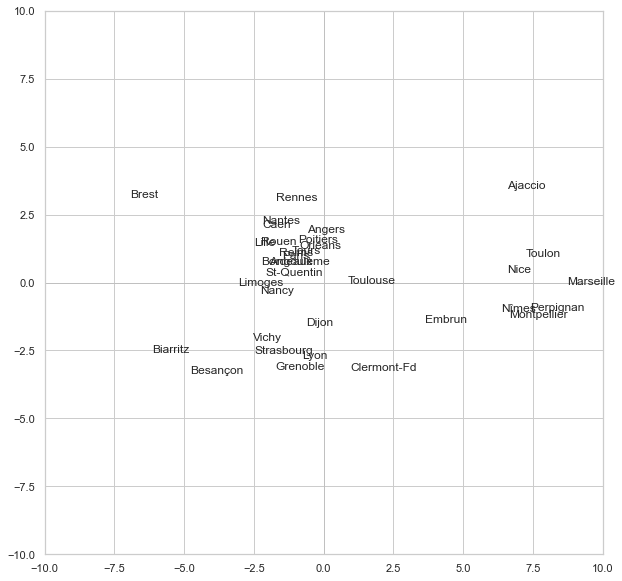

In [119]:
#Positionnement des individus dans le deuxième plan
fig, axes = plt.subplots(figsize=(10,10))
axes.set_xlim(-10,10) #même limites en abscisse
axes.set_ylim(-10,10) #et en ordonnée

#lacement des étiquettes des observations
for i in range(n):
    plt.annotate(df.index[i],(coord[i,0],coord[i,2]))
    
#ajouter les axes
plt.plot([-10,10],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-10,10],color='silver',linestyle='-',linewidth=1)

Nous n'avons plus les memes groupes retrouvés dans le premier plan. Un groupe de villes se démarque fortement des autres par son importance en terme de taille. C'est celui constitué de Limoge, St-Quentin, Nantes, Rennes entre autres qui contribue négativement au premier axe et positivement au troisième axe.
Ensuite nous remarquons la présence de groupes moins importants constitués de Biaritz, Vichy, Grenoble... ou de Nimes, Perpignan, Montpellier.

### Représentation des individus dans le troisième plan

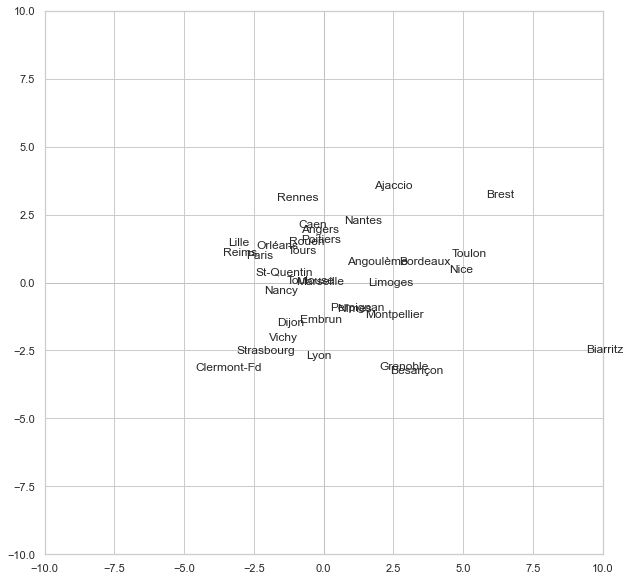

In [21]:
#Positionnement des individus dans le troisième plan
fig, axes = plt.subplots(figsize=(10,10))
axes.set_xlim(-10,10) #même limites en abscisse
axes.set_ylim(-10,10) #et en ordonnée

#Placement des étiquettes des observations
for i in range(n):
    plt.annotate(df.index[i],(coord[i,1],coord[i,2]))
    
#Ajouter les axes
plt.plot([-10,10],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-10,10],color='silver',linestyle='-',linewidth=1)

Nous remarquons que le typologie sur le troisième plan est beaucoup moins précise. Les villes semblent former un seul groupe. Ceci s'explique par le fait que ce plan factoriel est formé des axes 2 et 3 qui à eux deux restituent moins d'information que le premier axe. En effet, le deuxième et troisième axe restituent 38.87% de l'information disponible alors que le premier axe restitue 52.62% de l'information.


Avant de pouvoir interpréter les résultats il est nécessaire d'abord identifier les individus interprétables puis identifier les variables de nos composantes principales. Nous allons tout d'abord calculer la contribution de chaque individu à l'inertie totale puis à la formation des composante principales. 
Les individus avec une contribution supérieure à la moyenne uniquement seront interprétables. Quant aux autres, ils le sont peut être sur d'autres plans (CP4 etc...). 
 Pour calculer la qualité de représentation des individus sur les axes, nous devons d’abord calculer les carrés des distances à l’origine des individus, qui correspondent également à leur contribution dans l’inertie totale (COs au carré).

### CONTRIBUTION DES INDIVIDUS DANS L'INERTIE TOTALE

In [26]:
#Filtrer les individus avec d_i > à la moyenne de d_i
#Afficher les ID des ces individus
#contribution des individus dans l'inertie totale
di = np.sum(Z**2,axis=1)
df_ctr_ind = pd.DataFrame({'ID':df.index,'d_i':di})
df_ctr_ind 


ID         d_i
0       Ajaccio   64.098578
1        Angers    5.596387
2     Angoulème    6.787763
3      Besançon   42.218978
4      Biarritz  136.372614
5      Bordeaux   15.541360
6         Brest   93.665813
7          Caen   12.353819
8   Clermont-Fd   39.094149
9         Dijon    7.783499
10       Embrun   24.283313
11     Grenoble   20.285576
12        Lille   21.812407
13      Limoges   13.176156
14         Lyon   11.162475
15    Marseille   78.917666
16  Montpellier   53.018155
17        Nancy   11.487390
18       Nantes   12.276665
19         Nice   67.760771
20        Nîmes   44.257999
21      Orléans    8.480296
22        Paris   11.435389
23    Perpignan   60.921171
24     Poitiers    5.747733
25        Reims   17.409750
26       Rennes   15.806334
27        Rouen   10.824768
28   St-Quentin   11.842152
29   Strasbourg   24.623373
30       Toulon   76.607426
31     Toulouse    6.564524
32        Tours    4.772496
33        Vichy   17.013054

In [27]:
#Individus qui contribuent le plus à l'inertie totale
df_ctr_ind[df_ctr_ind['d_i'] > df_ctr_ind.d_i.mean()]

ID         d_i
0       Ajaccio   64.098578
3      Besançon   42.218978
4      Biarritz  136.372614
6         Brest   93.665813
8   Clermont-Fd   39.094149
15    Marseille   78.917666
16  Montpellier   53.018155
19         Nice   67.760771
20        Nîmes   44.257999
23    Perpignan   60.921171
30       Toulon   76.607426

Ainsi les villes Ajaccio, Besançon, Biarritz, Brest, Clermont-Fd entre autres contribuent le plus à l'inertie totale du nuage. nous observons également par exemple dans le premier plan factoriel que ces villes sont plus éloignés des groupes les plus importants en taille. 

Nous venons de calculer la  contribution de chaque individu pour l'ensemble de l'ACP. Nous allons calculer à présent la contribution de chaque individu dans notre premier, deuxième et troisième plan. Puis nous déduirons les individus interprétables dans chacun de ces plans.

### CONTRIBUTION DES INDIVIDUS AUX AXES DU PREMIER PLAN

In [121]:
#Contributions des individus aux axes du premier plan
eigval = (31-1)/31*acp.explained_variance_

ctr = coord**2
for j in range(31):
    ctr[:,j] = ctr[:,j]/(31*eigval[j])

df_ctr_cp1cp2 = pd.DataFrame({'id':df.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]})
df_ctr_cp1cp2 

id     CTR_1     CTR_2
0       Ajaccio  0.086199  0.012307
1        Angers  0.000721  0.002421
2     Angoulème  0.007484  0.002813
3      Besançon  0.045453  0.021545
4      Biarritz  0.075048  0.337077
5      Bordeaux  0.010096  0.028214
6         Brest  0.095055  0.129165
7          Caen  0.009655  0.003024
8   Clermont-Fd  0.001845  0.080210
9         Dijon  0.000751  0.010771
10       Embrun  0.026014  0.002813
11     Grenoble  0.006027  0.015158
12        Lille  0.012297  0.044418
13      Limoges  0.018598  0.009545
14         Lyon  0.001208  0.001546
15    Marseille  0.151066  0.003713
16  Montpellier  0.087831  0.008626
17        Nancy  0.010120  0.017234
18       Nantes  0.009758  0.002078
19         Nice  0.085824  0.077267
20        Nîmes  0.080652  0.000960
21      Orléans  0.001492  0.022204
22        Paris  0.004292  0.029246
23    Perpignan  0.108414  0.000194
24     Poitiers  0.001669  0.002440
25        Reims  0.005053  0.049481
26       Rennes  0.005671  0.010663
27        Rouen  0.010056  0.005964
28   St-Quentin  0.008620  0.022480
29   Strasbourg  0.012021  0.037484
30       Toulon  0.104365  0.081119
31     Toulouse  0.001510  0.006634
32        Tours  0.002582  0.006493
33        Vichy  0.012553  0.014695

In [31]:
#Garder les individus interprétables du premier axe du premier plan
df_ctr_cp1cp2[df_ctr_cp1cp2['CTR_1'] > df_ctr_cp1cp2.CTR_1.mean()]


id     CTR_1     CTR_2
0       Ajaccio  0.086199  0.012307
3      Besançon  0.045453  0.021545
4      Biarritz  0.075048  0.337077
6         Brest  0.095055  0.129165
15    Marseille  0.151066  0.003713
16  Montpellier  0.087831  0.008626
19         Nice  0.085824  0.077267
20        Nîmes  0.080652  0.000960
23    Perpignan  0.108414  0.000194
30       Toulon  0.104365  0.081119

On constate que les villes comme Ajaccio, Besançcon, Biarritz ... Perpignan et Toulon contribuent le plus au premier axe factoriel. 
Pourtant dans le premier plan factoriel, les villes Brest et Biarritz sont les les plus éloignés du premier axe. Nous avons par ailleurs constaté que les données por ces deux villes sont plus nettement plus grandes que celles des autres villes. 

In [32]:
#Garder les individus interprétables du deuxième axe du premier plan
df_ctr_cp1cp2[df_ctr_cp1cp2['CTR_2'] > df_ctr_cp1cp2.CTR_2.mean()]


id     CTR_1     CTR_2
4      Biarritz  0.075048  0.337077
6         Brest  0.095055  0.129165
8   Clermont-Fd  0.001845  0.080210
12        Lille  0.012297  0.044418
19         Nice  0.085824  0.077267
25        Reims  0.005053  0.049481
29   Strasbourg  0.012021  0.037484
30       Toulon  0.104365  0.081119

On constate que les villes comme Biarritz, Brest ... Strasbourg et Toulon contribuent le plus au deuxième axe factoriel.

### CONTRIBUTION DES INDIVIDUS AUX AXES DU DEUXIEME PLAN

In [122]:
#Contributions des individus aux axes du deuxième plan
eigval = (31-1)/31*acp.explained_variance_

ctr = coord**2
for j in range(31):
    ctr[:,j] = ctr[:,j]/(31*eigval[j])

df_ctr_cp1cp3 = pd.DataFrame({'id':df.index,'CTR_1':ctr[:,0],'CTR_3':ctr[:,2]})
df_ctr_cp1cp3

id     CTR_1     CTR_3
0       Ajaccio  0.086199  0.108568
1        Angers  0.000721  0.030094
2     Angoulème  0.007484  0.003819
3      Besançon  0.045453  0.101319
4      Biarritz  0.075048  0.059205
5      Bordeaux  0.010096  0.004065
6         Brest  0.095055  0.088417
7          Caen  0.009655  0.036945
8   Clermont-Fd  0.001845  0.094426
9         Dijon  0.000751  0.022184
10       Embrun  0.026014  0.019613
11     Grenoble  0.006027  0.092968
12        Lille  0.012297  0.016592
13      Limoges  0.018598  0.000108
14         Lyon  0.001208  0.071256
15    Marseille  0.151066  0.000067
16  Montpellier  0.087831  0.014772
17        Nancy  0.010120  0.001361
18       Nantes  0.009758  0.042122
19         Nice  0.085824  0.001127
20        Nîmes  0.080652  0.009941
21      Orléans  0.001492  0.013806
22        Paris  0.004292  0.007307
23    Perpignan  0.108414  0.009729
24     Poitiers  0.001669  0.019857
25        Reims  0.005053  0.009150
26       Rennes  0.005671  0.081549
27        Rouen  0.010056  0.017260
28   St-Quentin  0.008620  0.000720
29   Strasbourg  0.012021  0.061763
30       Toulon  0.104365  0.008209
31     Toulouse  0.001510  0.000022
32        Tours  0.002582  0.010375
33        Vichy  0.012553  0.041283

In [42]:
#Garder les individus interprétables du premier axe du deuxième plan
df_ctr_cp1cp3[df_ctr_cp1cp2['CTR_1'] > df_ctr_cp1cp2.CTR_1.mean()]


id     CTR_1     CTR_3
4      Biarritz  0.075048  0.059205
6         Brest  0.095055  0.088417
8   Clermont-Fd  0.001845  0.094426
12        Lille  0.012297  0.016592
19         Nice  0.085824  0.001127
25        Reims  0.005053  0.009150
29   Strasbourg  0.012021  0.061763
30       Toulon  0.104365  0.008209

In [44]:
#Garder les individus interprétables du deuxième axe du deuxième plan
df_ctr_cp1cp3[df_ctr_cp1cp3['CTR_3'] > df_ctr_cp1cp3.CTR_3.mean()]


id     CTR_1     CTR_3
0       Ajaccio  0.086199  0.108568
3      Besançon  0.045453  0.101319
4      Biarritz  0.075048  0.059205
6         Brest  0.095055  0.088417
7          Caen  0.009655  0.036945
8   Clermont-Fd  0.001845  0.094426
11     Grenoble  0.006027  0.092968
14         Lyon  0.001208  0.071256
18       Nantes  0.009758  0.042122
26       Rennes  0.005671  0.081549
29   Strasbourg  0.012021  0.061763
33        Vichy  0.012553  0.041283

### CONTRIBUTION DES INDIVIDUS AUX AXES DU TROISIEME PLAN

In [123]:
#Contributions des individus aux axes du troisième plan
eigval = (31-1)/31*acp.explained_variance_

ctr = coord**2
for j in range(31):
    ctr[:,j] = ctr[:,j]/(31*eigval[j])

df_ctr_cp2cp3 = pd.DataFrame({'id':df.index,'CTR_2':ctr[:,1],'CTR_3':ctr[:,2]})
df_ctr_cp2cp3

id     CTR_2     CTR_3
0       Ajaccio  0.012307  0.108568
1        Angers  0.002421  0.030094
2     Angoulème  0.002813  0.003819
3      Besançon  0.021545  0.101319
4      Biarritz  0.337077  0.059205
5      Bordeaux  0.028214  0.004065
6         Brest  0.129165  0.088417
7          Caen  0.003024  0.036945
8   Clermont-Fd  0.080210  0.094426
9         Dijon  0.010771  0.022184
10       Embrun  0.002813  0.019613
11     Grenoble  0.015158  0.092968
12        Lille  0.044418  0.016592
13      Limoges  0.009545  0.000108
14         Lyon  0.001546  0.071256
15    Marseille  0.003713  0.000067
16  Montpellier  0.008626  0.014772
17        Nancy  0.017234  0.001361
18       Nantes  0.002078  0.042122
19         Nice  0.077267  0.001127
20        Nîmes  0.000960  0.009941
21      Orléans  0.022204  0.013806
22        Paris  0.029246  0.007307
23    Perpignan  0.000194  0.009729
24     Poitiers  0.002440  0.019857
25        Reims  0.049481  0.009150
26       Rennes  0.010663  0.081549
27        Rouen  0.005964  0.017260
28   St-Quentin  0.022480  0.000720
29   Strasbourg  0.037484  0.061763
30       Toulon  0.081119  0.008209
31     Toulouse  0.006634  0.000022
32        Tours  0.006493  0.010375
33        Vichy  0.014695  0.041283

In [49]:
#Garder les individus interprétables du premier axe du troisième plan
df_ctr_cp2cp3[df_ctr_cp2cp3['CTR_2'] > df_ctr_cp2cp3.CTR_2.mean()]


id     CTR_2     CTR_3
4      Biarritz  0.337077  0.059205
6         Brest  0.129165  0.088417
8   Clermont-Fd  0.080210  0.094426
12        Lille  0.044418  0.016592
19         Nice  0.077267  0.001127
25        Reims  0.049481  0.009150
29   Strasbourg  0.037484  0.061763
30       Toulon  0.081119  0.008209

In [58]:
#Garder les individus interpretable du deuxième axe du troisième plan
df_ctr_cp2cp3[df_ctr_cp2cp3['CTR_3'] > df_ctr_cp2cp3.CTR_3.mean()]


id     CTR_2     CTR_3
0       Ajaccio  0.012307  0.108568
3      Besançon  0.021545  0.101319
4      Biarritz  0.337077  0.059205
6         Brest  0.129165  0.088417
7          Caen  0.003024  0.036945
8   Clermont-Fd  0.080210  0.094426
11     Grenoble  0.015158  0.092968
14         Lyon  0.001546  0.071256
18       Nantes  0.002078  0.042122
26       Rennes  0.010663  0.081549
29   Strasbourg  0.037484  0.061763
33        Vichy  0.014695  0.041283

Les individus ne sont pas tous bien représentés sur nos composantes principales. Dans un premier temps nous avons representé tous les individus sur le premier, deuxième et troisième axe. Notre objectif est d'afficher ceux qui seront interprétables. Pour cela nous allons calculer la qualité de représentations d'un individus dans les trois plans.


### QUALITE DE REPRESENTATION DES INDIVIDUS SUR LE PREMIER PLAN

In [51]:
#Qualité de représentation des individus - COS2 premier plan
cos2 = coord**2
for j in range(31):
    cos2[:,j] = cos2[:,j]/di
    df_ctr_12 = pd.DataFrame({'id':df.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]})
df_ctr_12

id    COS2_1    COS2_2
0       Ajaccio  0.677966  0.050252
1        Angers  0.064957  0.113221
2     Angoulème  0.555839  0.108454
3      Besançon  0.542753  0.133563
4      Biarritz  0.277437  0.646921
5      Bordeaux  0.327502  0.475148
6         Brest  0.511615  0.360921
7          Caen  0.394016  0.064069
8   Clermont-Fd  0.023792  0.536987
9         Dijon  0.048637  0.362192
10       Embrun  0.540064  0.030317
11     Grenoble  0.149791  0.195574
12        Lille  0.284206  0.532976
13      Limoges  0.711596  0.189600
14         Lyon  0.054574  0.036257
15    Marseille  0.965038  0.012314
16  Montpellier  0.835168  0.042582
17        Nancy  0.444126  0.392668
18       Nantes  0.400721  0.044297
19         Nice  0.638529  0.298443
20        Nîmes  0.918700  0.005676
21      Orléans  0.088698  0.685276
22        Paris  0.189204  0.669356
23    Perpignan  0.897160  0.000832
24     Poitiers  0.146369  0.111115
25        Reims  0.146334  0.743859
26       Rennes  0.180876  0.176559
27        Rouen  0.468314  0.144189
28   St-Quentin  0.366974  0.496829
29   Strasbourg  0.246116  0.398425
30       Toulon  0.686809  0.277142
31     Toulouse  0.115977  0.264485
32        Tours  0.272761  0.356081
33        Vichy  0.371986  0.226060

In [53]:
#Filtrer les individus ayant une bonne représentation sur l'axe 1 
df_ctr_12[df_ctr_12['COS2_1'] > df_ctr_12.COS2_1.mean()]

id    COS2_1    COS2_2
0       Ajaccio  0.677966  0.050252
2     Angoulème  0.555839  0.108454
3      Besançon  0.542753  0.133563
6         Brest  0.511615  0.360921
10       Embrun  0.540064  0.030317
13      Limoges  0.711596  0.189600
15    Marseille  0.965038  0.012314
16  Montpellier  0.835168  0.042582
17        Nancy  0.444126  0.392668
18       Nantes  0.400721  0.044297
19         Nice  0.638529  0.298443
20        Nîmes  0.918700  0.005676
23    Perpignan  0.897160  0.000832
27        Rouen  0.468314  0.144189
30       Toulon  0.686809  0.277142

Nous remarquons que par rapport à la remarque que nous avions faite sur la contriution de Biarritz au premier axe, nous avons plus d'explications. En effet, Biarritz n'a pas une bonne représentation sur l'axe 1. 

In [124]:
#Filtrer les individus ayant une bonne représentation sur l'axe 2
df_ctr_12[df_ctr_12['COS2_2'] > df_ctr_12.COS2_2.mean()]

id    COS2_1    COS2_2
4      Biarritz  0.277437  0.646921
5      Bordeaux  0.327502  0.475148
6         Brest  0.511615  0.360921
8   Clermont-Fd  0.023792  0.536987
9         Dijon  0.048637  0.362192
12        Lille  0.284206  0.532976
17        Nancy  0.444126  0.392668
19         Nice  0.638529  0.298443
21      Orléans  0.088698  0.685276
22        Paris  0.189204  0.669356
25        Reims  0.146334  0.743859
28   St-Quentin  0.366974  0.496829
29   Strasbourg  0.246116  0.398425
30       Toulon  0.686809  0.277142
32        Tours  0.272761  0.356081

In [73]:
#Afficher les individus bien représentés sur l'axe1 et axe 2
df_ctr_12[df_ctr_12['COS2_1'] > df_ctr_12.COS2_1.mean()].id.append(df_ctr_12[df_ctr_12['COS2_2'] > df_ctr_12.COS2_2.mean()].id).drop_duplicates().reset_index(drop = True)

0         Ajaccio
1       Angoulème
2        Besançon
3           Brest
4          Embrun
5         Limoges
6       Marseille
7     Montpellier
8           Nancy
9          Nantes
10           Nice
11          Nîmes
12      Perpignan
13          Rouen
14         Toulon
15       Biarritz
16       Bordeaux
17    Clermont-Fd
18          Dijon
19          Lille
20        Orléans
21          Paris
22          Reims
23     St-Quentin
24     Strasbourg
25          Tours
Name: id, dtype: object

Nous avons ainsi obtenu les villes les mieux représentées sur les axes 1 et 2. 

### QUALITE DE REPRESENTATION DES INDIVIDUS SUR LE DEUXIEME PLAN

In [55]:
#Qualité de représentation des individus - COS2 deuxième plan
cos2 = coord**2
for j in range(31):
    cos2[:,j] = cos2[:,j]/di
    df_ctr_13 = pd.DataFrame({'id':df.index,'COS2_1':cos2[:,0],'COS2_3':cos2[:,2]})
df_ctr_13

id    COS2_1    COS2_3
0       Ajaccio  0.677966  0.187666
1        Angers  0.064957  0.595812
2     Angoulème  0.555839  0.062330
3      Besançon  0.542753  0.265897
4      Biarritz  0.277437  0.048102
5      Bordeaux  0.327502  0.028982
6         Brest  0.511615  0.104589
7          Caen  0.394016  0.331348
8   Clermont-Fd  0.023792  0.267616
9         Dijon  0.048637  0.315791
10       Embrun  0.540064  0.089488
11     Grenoble  0.149791  0.507783
12        Lille  0.284206  0.084279
13      Limoges  0.711596  0.000908
14         Lyon  0.054574  0.707287
15    Marseille  0.965038  0.000094
16  Montpellier  0.835168  0.030872
17        Nancy  0.444126  0.013128
18       Nantes  0.400721  0.380154
19         Nice  0.638529  0.001843
20        Nîmes  0.918700  0.024886
21      Orléans  0.088698  0.180377
22        Paris  0.189204  0.070798
23    Perpignan  0.897160  0.017695
24     Poitiers  0.146369  0.382778
25        Reims  0.146334  0.058232
26       Rennes  0.180876  0.571636
27        Rouen  0.468314  0.176663
28   St-Quentin  0.366974  0.006739
29   Strasbourg  0.246116  0.277913
30       Toulon  0.686809  0.011873
31     Toulouse  0.115977  0.000371
32        Tours  0.272761  0.240877
33        Vichy  0.371986  0.268859

In [60]:
#Filtrer les individus ayant une bonne représentation sur l'axe 1 
df_ctr_13[df_ctr_13['COS2_1'] > df_ctr_13.COS2_1.mean()]

id    COS2_1    COS2_3
0       Ajaccio  0.677966  0.187666
2     Angoulème  0.555839  0.062330
3      Besançon  0.542753  0.265897
6         Brest  0.511615  0.104589
10       Embrun  0.540064  0.089488
13      Limoges  0.711596  0.000908
15    Marseille  0.965038  0.000094
16  Montpellier  0.835168  0.030872
17        Nancy  0.444126  0.013128
18       Nantes  0.400721  0.380154
19         Nice  0.638529  0.001843
20        Nîmes  0.918700  0.024886
23    Perpignan  0.897160  0.017695
27        Rouen  0.468314  0.176663
30       Toulon  0.686809  0.011873

In [61]:
#Filtrer les individus ayant une bonne représentation sur l'axe 3 
df_ctr_13[df_ctr_13['COS2_3'] > df_ctr_13.COS2_3.mean()]

id    COS2_1    COS2_3
0       Ajaccio  0.677966  0.187666
1        Angers  0.064957  0.595812
3      Besançon  0.542753  0.265897
7          Caen  0.394016  0.331348
8   Clermont-Fd  0.023792  0.267616
9         Dijon  0.048637  0.315791
11     Grenoble  0.149791  0.507783
14         Lyon  0.054574  0.707287
18       Nantes  0.400721  0.380154
24     Poitiers  0.146369  0.382778
26       Rennes  0.180876  0.571636
29   Strasbourg  0.246116  0.277913
32        Tours  0.272761  0.240877
33        Vichy  0.371986  0.268859

In [75]:
#Afficher les individus bien représentés sur l'axe1 et axe 3
df_ctr_13[df_ctr_13['COS2_1'] > df_ctr_13.COS2_1.mean()].id.append(df_ctr_13[df_ctr_13['COS2_3'] > df_ctr_13.COS2_3.mean()].id).drop_duplicates().reset_index(drop = True)

0        Biarritz
1        Bordeaux
2           Brest
3     Clermont-Fd
4           Dijon
5           Lille
6           Nancy
7            Nice
8         Orléans
9           Paris
10          Reims
11     St-Quentin
12     Strasbourg
13         Toulon
14          Tours
15        Ajaccio
16         Angers
17       Besançon
18           Caen
19       Grenoble
20           Lyon
21         Nantes
22       Poitiers
23         Rennes
24          Vichy
Name: id, dtype: object

Nous avons ici les villes à retenir pour le deuxième plan factoriel.

### QUALITE DE REPRESENTATION DES INDIVIDUS SUR LE TROISIEME PLAN

In [68]:
#Qualité de représentation des individus - COS2 troisième plan
cos2 = coord**2
for j in range(31):
    cos2[:,j] = cos2[:,j]/di
    df_ctr_23 = pd.DataFrame({'id':df.index,'COS2_2':cos2[:,1],'COS2_3':cos2[:,2]})
df_ctr_23

id    COS2_2    COS2_3
0       Ajaccio  0.050252  0.187666
1        Angers  0.113221  0.595812
2     Angoulème  0.108454  0.062330
3      Besançon  0.133563  0.265897
4      Biarritz  0.646921  0.048102
5      Bordeaux  0.475148  0.028982
6         Brest  0.360921  0.104589
7          Caen  0.064069  0.331348
8   Clermont-Fd  0.536987  0.267616
9         Dijon  0.362192  0.315791
10       Embrun  0.030317  0.089488
11     Grenoble  0.195574  0.507783
12        Lille  0.532976  0.084279
13      Limoges  0.189600  0.000908
14         Lyon  0.036257  0.707287
15    Marseille  0.012314  0.000094
16  Montpellier  0.042582  0.030872
17        Nancy  0.392668  0.013128
18       Nantes  0.044297  0.380154
19         Nice  0.298443  0.001843
20        Nîmes  0.005676  0.024886
21      Orléans  0.685276  0.180377
22        Paris  0.669356  0.070798
23    Perpignan  0.000832  0.017695
24     Poitiers  0.111115  0.382778
25        Reims  0.743859  0.058232
26       Rennes  0.176559  0.571636
27        Rouen  0.144189  0.176663
28   St-Quentin  0.496829  0.006739
29   Strasbourg  0.398425  0.277913
30       Toulon  0.277142  0.011873
31     Toulouse  0.264485  0.000371
32        Tours  0.356081  0.240877
33        Vichy  0.226060  0.268859

In [69]:
#Filtrer les individus ayant une bonne représentation sur l'axe 2 
df_ctr_23[df_ctr_23['COS2_2'] > df_ctr_23.COS2_2.mean()]

id    COS2_2    COS2_3
4      Biarritz  0.646921  0.048102
5      Bordeaux  0.475148  0.028982
6         Brest  0.360921  0.104589
8   Clermont-Fd  0.536987  0.267616
9         Dijon  0.362192  0.315791
12        Lille  0.532976  0.084279
17        Nancy  0.392668  0.013128
19         Nice  0.298443  0.001843
21      Orléans  0.685276  0.180377
22        Paris  0.669356  0.070798
25        Reims  0.743859  0.058232
28   St-Quentin  0.496829  0.006739
29   Strasbourg  0.398425  0.277913
30       Toulon  0.277142  0.011873
32        Tours  0.356081  0.240877

In [70]:
#Filtrer les individus ayant une bonne représentation sur l'axe 3 
df_ctr_23[df_ctr_23['COS2_3'] > df_ctr_23.COS2_3.mean()]

id    COS2_2    COS2_3
0       Ajaccio  0.050252  0.187666
1        Angers  0.113221  0.595812
3      Besançon  0.133563  0.265897
7          Caen  0.064069  0.331348
8   Clermont-Fd  0.536987  0.267616
9         Dijon  0.362192  0.315791
11     Grenoble  0.195574  0.507783
14         Lyon  0.036257  0.707287
18       Nantes  0.044297  0.380154
24     Poitiers  0.111115  0.382778
26       Rennes  0.176559  0.571636
29   Strasbourg  0.398425  0.277913
32        Tours  0.356081  0.240877
33        Vichy  0.226060  0.268859

In [79]:
#Afficher les individus bien représentés sur l'axe 2 et axe 3
df_ctr_23[df_ctr_23['COS2_2'] > df_ctr_23.COS2_2.mean()].id.append(df_ctr_23[df_ctr_23['COS2_3'] > df_ctr_23.COS2_3.mean()].id).drop_duplicates().reset_index(drop = True)

0        Biarritz
1        Bordeaux
2           Brest
3     Clermont-Fd
4           Dijon
5           Lille
6           Nancy
7            Nice
8         Orléans
9           Paris
10          Reims
11     St-Quentin
12     Strasbourg
13         Toulon
14          Tours
15        Ajaccio
16         Angers
17       Besançon
18           Caen
19       Grenoble
20           Lyon
21         Nantes
22       Poitiers
23         Rennes
24          Vichy
Name: id, dtype: object

## REPRESENTATION DES VARIABLES

 Nous allons à présent caractériser nos composantes principales. Chaque composante est constituée d'une combinaison linéaire des variables corrélées de notre jeu de données.

Nous analyserons par la suite  le cercle des corrélations et en déduirons quels individus seront à droite ou à gauche du premier axe et ceux qui se retrouveront en haut ou en bas du deuxième axe du plan.

In [82]:
# Vecteurs propres
pd.DataFrame(acp.components_)

0             1             2             3             4   \
0  -0.121653 -4.697622e-02 -2.583594e-02 -9.688033e-02 -1.567778e-01   
1   0.277725  3.236130e-01  3.229935e-01  2.776204e-01  1.034613e-01   
2   0.079857  3.619924e-02 -6.054651e-02 -1.694439e-01 -3.149645e-01   
3   0.187096  1.731703e-01  4.905759e-02  1.060349e-01 -1.195093e-03   
4  -0.056102 -1.068521e-01 -7.235377e-02  1.867377e-01  5.497614e-01   
5  -0.292627 -2.213047e-02  2.834260e-02  3.605457e-01 -2.948556e-01   
6   0.031753 -4.600624e-02 -2.182532e-01  6.213212e-02  5.748841e-02   
7  -0.096529 -3.454152e-02 -4.611322e-01 -5.074968e-02 -2.090462e-01   
8  -0.076420 -4.049418e-01  2.993788e-01 -1.928363e-02 -4.695822e-02   
9  -0.279453 -6.970786e-02  3.902426e-01  4.004983e-01 -9.730645e-03   
10 -0.055966  1.289414e-01  1.371822e-01  1.192929e-02 -7.202734e-02   
11  0.022209  4.816349e-02  2.660323e-01 -2.395327e-02 -5.631549e-02   
12  0.417406 -2.060740e-01 -1.257536e-01  2.374395e-01  1.039650e-01   
13  0.131866 -3.064518e-02  2.253324e-01 -3.200764e-01 -2.569215e-01   
14  0.145185  3.691165e-01 -8.134257e-02  2.128105e-01 -1.381659e-01   
15  0.271360  1.354353e-01 -1.759923e-01 -4.494092e-02  7.801508e-02   
16 -0.053576  3.045748e-01  1.797893e-01 -2.787210e-01  1.764838e-01   
17 -0.222242  3.215948e-01 -3.336921e-02 -2.464852e-01  8.181054e-02   
18 -0.091947  3.384943e-02  1.308904e-01 -1.212275e-01 -2.243446e-01   
19 -0.196839  9.186773e-03  1.348636e-01 -2.268703e-01  2.333975e-01   
20  0.083545  1.905726e-01  1.038404e-01  1.323104e-01 -2.581641e-01   
21  0.339849 -2.963020e-01  2.314792e-01 -2.049946e-01 -6.322595e-02   
22  0.139885  1.704730e-01  8.156006e-02 -1.397125e-01  1.104151e-01   
23 -0.016487  1.902251e-01  1.768356e-02  1.977546e-02 -9.267922e-03   
24 -0.003288  1.385245e-01 -1.525235e-01  1.747443e-02 -7.526564e-02   
25 -0.121703 -4.165054e-02  2.698443e-02 -1.827788e-01  2.669656e-01   
26 -0.185484 -8.022385e-03 -1.595900e-02  6.263416e-02 -3.534798e-02   
27  0.294463 -1.857858e-01  4.200418e-02 -3.634635e-02 -8.034902e-02   
28 -0.055724 -1.057419e-01 -1.239467e-01  8.380271e-02 -3.391623e-02   
29 -0.113466 -8.549987e-02 -7.395897e-02 -6.810732e-02 -7.292282e-02   
30 -0.000000 -6.406133e-17 -1.542641e-16  2.055108e-17 -2.262589e-16   

              5             6             7             8             9   ...  \
0  -1.737396e-01 -2.111658e-01 -1.922993e-01 -7.829064e-02  4.942115e-02  ...   
1   2.005814e-05 -3.655441e-02  5.328617e-02  2.703358e-01  3.078749e-01  ...   
2  -3.548649e-01 -2.255952e-01 -2.938386e-01 -2.283982e-01 -3.502145e-02  ...   
3   1.769708e-01  1.190653e-01  8.247195e-03 -2.247429e-01 -3.339474e-01  ...   
4   5.389093e-02 -3.994819e-02 -2.603627e-01 -1.826936e-01 -1.860571e-01  ...   
5  -1.584480e-01  2.243341e-01 -1.219189e-01 -6.763148e-02  6.856215e-02  ...   
6   8.738645e-02 -1.705193e-01  1.030010e-01 -3.438032e-02 -1.308990e-01  ...   
7   6.089864e-02  1.203219e-01  9.761180e-02  2.431132e-01 -9.528182e-02  ...   
8   3.054254e-02 -3.281112e-01  3.356407e-01 -1.010615e-01  1.821767e-01  ...   
9   3.030658e-02 -8.224481e-02  6.537460e-02  3.324054e-02 -2.794792e-01  ...   
10 -3.988976e-03  3.565670e-01  2.739933e-02 -3.501643e-01  3.488507e-01  ...   
11 -1.204082e-01 -2.776686e-01 -2.354413e-01  1.962180e-01  5.716350e-02  ...   
12 -1.735252e-01 -2.958554e-01 -1.427789e-01 -1.383649e-01 -2.033862e-02  ...   
13  4.457946e-01 -1.492376e-01  9.988764e-02 -1.609740e-01 -9.741889e-02  ...   
14  2.998791e-01 -1.732406e-01 -2.063159e-01  1.666849e-01 -1.997608e-01  ...   
15 -5.238412e-03 -1.020956e-01  3.160899e-01 -1.395133e-01  2.899676e-01  ...   
16 -2.524480e-01  1.570174e-01 -7.638315e-02 -7.905255e-02 -1.797288e-01  ...   
17  6.873059e-02 -5.796727e-02  8.218045e-02 -3.786497e-03 -5.756880e-03  ...   
18  5.457405e-02 -1.591609e-01  1.924977e-02  3.074927e-01 -2.022886e-01  ...   
19  2.072545e-01 -9.407571e-02 -2.856726e-01 -2.269518e-01  8.590598e-02  ...   
20  

In [83]:
#Matrice de corrélation

#Racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)

#Corrélation des variables avec les axes
corvar = np.zeros((p,p))
for k in range(p):
    corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#Afficher la matrice des corrélations variables x facteurs
print(pd.DataFrame(corvar))

          0         1         2         3         4         5         6   \
0  -0.490589  0.806973  0.150972  0.176517 -0.034263 -0.147781  0.015154   
1  -0.189441  0.940307  0.068436  0.163379 -0.065258 -0.011176 -0.021957   
2  -0.104188  0.938506 -0.114465  0.046284 -0.044189  0.014313 -0.104163   
3  -0.390688  0.806668 -0.320340  0.100039  0.114047  0.182082  0.029653   
4  -0.632236  0.300623 -0.595452 -0.001128  0.335758 -0.148907  0.027437   
5  -0.700638  0.000058 -0.670885  0.166964  0.032913 -0.080019  0.041706   
6  -0.851566 -0.106214 -0.426496  0.112333 -0.024398  0.113293 -0.081381   
7  -0.775484  0.154831 -0.555513  0.007781 -0.159012 -0.061571  0.049158   
8  -0.315722  0.785501 -0.431795 -0.212035 -0.111577 -0.034155 -0.016408   
9   0.199300  0.894577 -0.066209 -0.315065 -0.113631  0.034625 -0.062472   
10 -0.006530  0.938728  0.104187  0.026817 -0.061170  0.114587  0.205098   
11 -0.261356  0.934001  0.127702  0.002281  0.031763 -0.056276 -0.018165   
12 -0.462586

In [126]:
#Matrice des corrélations des variables avec les trois premiers axes 
#On affiche pour les deux premiers axes
print(pd.DataFrame({'id':df.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1],'COR_3':corvar[:,2]} ))

                                     id     COR_1     COR_2     COR_3
0                              JANVIERp -0.490589  0.806973  0.150972
1                              FEVRIERp -0.189441  0.940307  0.068436
2                                 MARSp -0.104188  0.938506 -0.114465
3                                AVRILp -0.390688  0.806668 -0.320340
4                                  MAIp -0.632236  0.300623 -0.595452
5                                 JUINp -0.700638  0.000058 -0.670885
6                              JUILLETp -0.851566 -0.106214 -0.426496
7                                 AOUTp -0.775484  0.154831 -0.555513
8                            SEPTEMBREp -0.315722  0.785501 -0.431795
9                              OCTOBREp  0.199300  0.894577 -0.066209
10                            NOVEMBREp -0.006530  0.938728  0.104187
11                            DECEMBREp -0.261356  0.934001  0.127702
12             Précipitations annuelles -0.462586  0.846689 -0.252813
13                  

Nous avons déterminé les corrélations des variables aux trois axes. Pour le premier axe, nous observons une corrélation positive entre les variables "Insolation annuelle", "Température moyenne annuelle", et "Amplitude annuelle des températures" et une corrélation négative pour les autres variables. 

Nous pouvons afficher à présent le cercle des corrélations qui est un outil graphique qui permet de comprendre la nature des axes. Il sert à interpréter les axes. 

### REPRESENTATION DES VARIABLES DANS LE PREMIER PLAN

In [111]:
## Contribution des variables aux axes du premier plan
ctrvar = cos2var

for k in range(p):
    ctrvar[:,k] = ctrvar[:,k]/val_p[k]
    
#On affiche pour les deux premiers axes
pd.DataFrame({'id':df.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1]}) 

id         CTR_1         CTR_2
0                              JANVIERp  9.047024e-04  9.082244e-03
1                              FEVRIERp  1.349011e-04  1.233145e-02
2                                 MARSp  4.080447e-05  1.228428e-02
3                                AVRILp  5.737603e-04  9.075380e-03
4                                  MAIp  1.502547e-03  1.260429e-03
5                                 JUINp  1.845258e-03  4.737439e-11
6                              JUILLETp  2.725878e-03  1.573409e-04
7                                 AOUTp  2.260554e-03  3.343422e-04
8                            SEPTEMBREp  3.746959e-04  8.605363e-03
9                              OCTOBREp  1.493087e-04  1.116119e-02
10                            NOVEMBREp  1.603085e-07  1.229009e-02
11                            DECEMBREp  2.567648e-04  1.216663e-02
12             Précipitations annuelles  8.043685e-04  9.998230e-03
13                       JANVIERnb.j.pl  3.208406e-03  1.473720e-04
14                       FEVRIERnb.j.pl  3.295049e-03  4.467284e-04
15                          MARSnb.j.pl  3.067030e-03  4.307749e-07
16                         AVRILnb.j.pl  3.435183e-03  1.622279e-05
17                           MAInb.j.pl  3.315039e-03  2.740839e-08
18                          JUINnb.j.pl  3.278590e-03  6.983323e-04
19                       JUILLETnb.j.pl  3.436495e-03  6.169100e-04
20                          AOUTnb.j.pl  3.380057e-03  6.397766e-04
21                     SEPTEMBREnb.j.pl  3.450282e-03  1.068414e-04
22                       OCTOBREnb.j.pl  3.137224e-03  1.151298e-04
23                      NOVEMBREnb.j.pl  3.222321e-03  2.965313e-05
24                      DECEMBREnb.j.pl  2.925337e-03  1.382510e-06
25      Nombre annuel de jours de pluie  3.609564e-03  1.398132e-04
26         Température moyenne annuelle  1.932624e-03  4.009405e-03
27  Amplitude annuelle des températures  3.579638e-04  2.807958e-03
28                  Insolation annuelle  3.060942e-03  1.949414e-03
29         Précipitations de mai à aout  1.212957e-03  6.044630e-03
30              Précipitations sept-oct  2.319147e-04  1.233344e-03

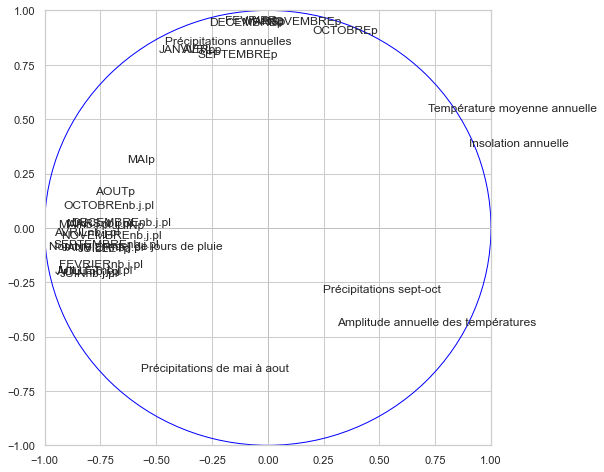

In [98]:
#Cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

#Affichage des étiquettes (noms des variables)
for j in range(p):
    plt.annotate(df.columns[j],(corvar[j,0],corvar[j,1]))

#Ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#Ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

Analyse du cercle de corrélation : On retrouvera à droite des villes avec une Température moyenne annuelle et Insolation annuelle élevéé. C'est pour cela que nous retrouvions plus tot dans le nuage des individus du premier plan des villes comme Marseille, Nice à droite.

Nous allons maintenant étudier la qualité de représentation de chaque variable.

In [95]:
#Qualité de représentation des variables sur les axes
#cosinus carré des variables
cos2var = corvar**2
df_ctr_variables = pd.DataFrame({'id':df.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1]})

In [96]:
#Filtrer les variables avec un taux de représentation supérier à la moyenne sur l'axe 1
df_ctr_variables[df_ctr_variables['COS2_1'] > df_ctr_variables['COS2_1'].mean()]

id    COS2_1    COS2_2
6                          JUILLETp  0.725165  0.011281
7                             AOUTp  0.601375  0.023973
13                   JANVIERnb.j.pl  0.853532  0.010567
14                   FEVRIERnb.j.pl  0.876582  0.032031
15                      MARSnb.j.pl  0.815922  0.000031
16                     AVRILnb.j.pl  0.913862  0.001163
17                       MAInb.j.pl  0.881900  0.000002
18                      JUINnb.j.pl  0.872203  0.050071
19                   JUILLETnb.j.pl  0.914211  0.044233
20                      AOUTnb.j.pl  0.899197  0.045873
21                 SEPTEMBREnb.j.pl  0.917878  0.007661
22                   OCTOBREnb.j.pl  0.834596  0.008255
23                  NOVEMBREnb.j.pl  0.857234  0.002126
24                  DECEMBREnb.j.pl  0.778227  0.000099
25  Nombre annuel de jours de pluie  0.960252  0.010025
28              Insolation annuelle  0.814302  0.139775

In [97]:
# Filtrer les variables avec un taux de représentation supérier à la moyenne sur l'axe 2
df_ctr_variables[df_ctr_variables['COS2_2'] > df_ctr_variables['COS2_2'].mean()]

id    COS2_1    COS2_2
0                       JANVIERp  0.240678  0.651205
1                       FEVRIERp  0.035888  0.884176
2                          MARSp  0.010855  0.880794
3                         AVRILp  0.152637  0.650713
8                     SEPTEMBREp  0.099680  0.617012
9                       OCTOBREp  0.039721  0.800268
10                     NOVEMBREp  0.000043  0.881211
11                     DECEMBREp  0.068307  0.872358
12      Précipitations annuelles  0.213986  0.716882
26  Température moyenne annuelle  0.514136  0.287478
29  Précipitations de mai à aout  0.322683  0.433406

 ### REPRESENTATION DES VARIABLES DANS LE DEUXIEME PLAN

In [99]:
## Contribution des variables aux axes du deuxième plan
ctr = coord**2  

for j in range(p):
    ctr[:,j] = ctr[:,j]/(n*val_p[j])

pd.DataFrame({'id':df.index,'CTR_1':ctr[:,0],'CTR_3':ctr[:,2]}) 

id     CTR_1     CTR_3
0       Ajaccio  0.078363  0.098698
1        Angers  0.000656  0.027359
2     Angoulème  0.006803  0.003471
3      Besançon  0.041321  0.092108
4      Biarritz  0.068225  0.053823
5      Bordeaux  0.009178  0.003696
6         Brest  0.086413  0.080379
7          Caen  0.008777  0.033586
8   Clermont-Fd  0.001677  0.085842
9         Dijon  0.000683  0.020167
10       Embrun  0.023649  0.017830
11     Grenoble  0.005479  0.084516
12        Lille  0.011179  0.015083
13      Limoges  0.016907  0.000098
14         Lyon  0.001098  0.064779
15    Marseille  0.137333  0.000061
16  Montpellier  0.079846  0.013429
17        Nancy  0.009200  0.001237
18       Nantes  0.008871  0.038293
19         Nice  0.078022  0.001024
20        Nîmes  0.073320  0.009037
21      Orléans  0.001356  0.012551
22        Paris  0.003902  0.006643
23    Perpignan  0.098558  0.008845
24     Poitiers  0.001517  0.018052
25        Reims  0.004594  0.008318
26       Rennes  0.005155  0.074135
27        Rouen  0.009141  0.015691
28   St-Quentin  0.007836  0.000655
29   Strasbourg  0.010928  0.056148
30       Toulon  0.094877  0.007463
31     Toulouse  0.001373  0.000020
32        Tours  0.002347  0.009432
33        Vichy  0.011412  0.037530

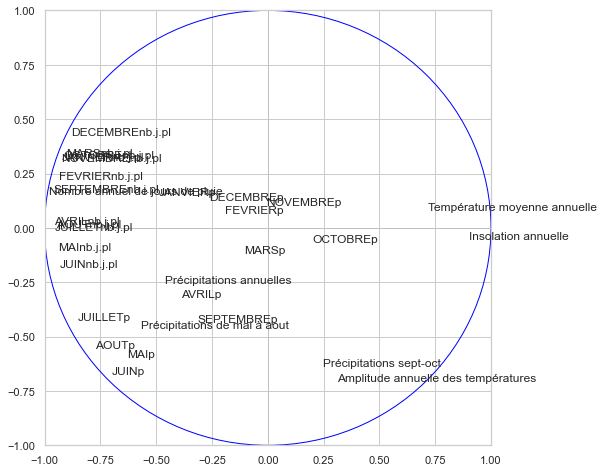

In [100]:
#Cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

#Affichage des étiquettes (noms des variables)
for j in range(p):
    plt.annotate(df.columns[j],(corvar[j,0],corvar[j,2]))

#Ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#Ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

In [101]:
#Qualité de représentation des variables sur les axes
#cosinus carré des variables
cos2var = corvar**2
df_ctr_variables = pd.DataFrame({'id':df.columns,'COS2_1':cos2var[:,0],'COS2_3':cos2var[:,2]})

In [103]:
df_ctr_variables[df_ctr_variables['COS2_1'] > df_ctr_variables['COS2_1'].mean()]

id    COS2_1    COS2_3
6                          JUILLETp  0.725165  0.181899
7                             AOUTp  0.601375  0.308594
13                   JANVIERnb.j.pl  0.853532  0.095937
14                   FEVRIERnb.j.pl  0.876582  0.049459
15                      MARSnb.j.pl  0.815922  0.107595
16                     AVRILnb.j.pl  0.913862  0.000295
17                       MAInb.j.pl  0.881900  0.010647
18                      JUINnb.j.pl  0.872203  0.033413
19                   JUILLETnb.j.pl  0.914211  0.000105
20                      AOUTnb.j.pl  0.899197  0.000001
21                 SEPTEMBREnb.j.pl  0.917878  0.026299
22                   OCTOBREnb.j.pl  0.834596  0.102819
23                  NOVEMBREnb.j.pl  0.857234  0.094283
24                  DECEMBREnb.j.pl  0.778227  0.182383
25  Nombre annuel de jours de pluie  0.960252  0.024114
28              Insolation annuelle  0.814302  0.002664

In [104]:
df_ctr_variables[df_ctr_variables['COS2_3'] > df_ctr_variables['COS2_3'].mean()]

id    COS2_1    COS2_3
4                                  MAIp  0.399723  0.354563
5                                 JUINp  0.490894  0.450087
6                              JUILLETp  0.725165  0.181899
7                                 AOUTp  0.601375  0.308594
8                            SEPTEMBREp  0.099680  0.186447
24                      DECEMBREnb.j.pl  0.778227  0.182383
27  Amplitude annuelle des températures  0.095229  0.498573
29         Précipitations de mai à aout  0.322683  0.212395
30              Précipitations sept-oct  0.061696  0.406618

### REPRESENTATION DES VARIABLES DANS LE TROISIEME PLAN

In [105]:
## Contribution des variables aux axes du 3eme plan
ctr = coord**2  

for j in range(p):
    ctr[:,j] = ctr[:,j]/(n*val_p[j])

pd.DataFrame({'id':df.index,'CTR_2':ctr[:,1],'CTR_3':ctr[:,2]}) 

id     CTR_2     CTR_3
0       Ajaccio  0.011188  0.098698
1        Angers  0.002201  0.027359
2     Angoulème  0.002557  0.003471
3      Besançon  0.019586  0.092108
4      Biarritz  0.306434  0.053823
5      Bordeaux  0.025649  0.003696
6         Brest  0.117423  0.080379
7          Caen  0.002749  0.033586
8   Clermont-Fd  0.072918  0.085842
9         Dijon  0.009792  0.020167
10       Embrun  0.002557  0.017830
11     Grenoble  0.013780  0.084516
12        Lille  0.040380  0.015083
13      Limoges  0.008677  0.000098
14         Lyon  0.001406  0.064779
15    Marseille  0.003375  0.000061
16  Montpellier  0.007842  0.013429
17        Nancy  0.015668  0.001237
18       Nantes  0.001889  0.038293
19         Nice  0.070242  0.001024
20        Nîmes  0.000873  0.009037
21      Orléans  0.020185  0.012551
22        Paris  0.026587  0.006643
23    Perpignan  0.000176  0.008845
24     Poitiers  0.002218  0.018052
25        Reims  0.044982  0.008318
26       Rennes  0.009693  0.074135
27        Rouen  0.005421  0.015691
28   St-Quentin  0.020436  0.000655
29   Strasbourg  0.034076  0.056148
30       Toulon  0.073745  0.007463
31     Toulouse  0.006031  0.000020
32        Tours  0.005903  0.009432
33        Vichy  0.013359  0.037530

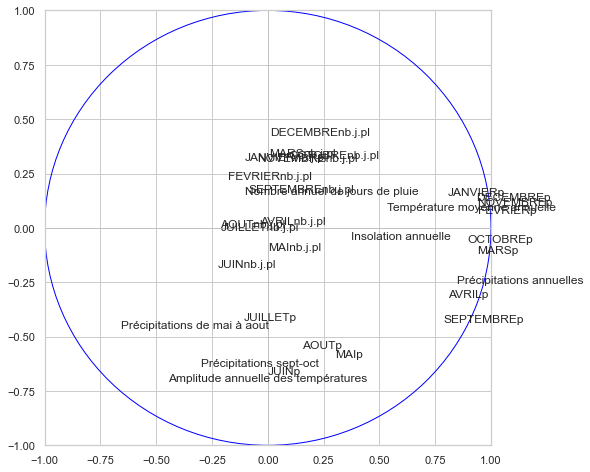

In [106]:
#Cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

#Affichage des étiquettes (noms des variables)
for j in range(p):
    plt.annotate(df.columns[j],(corvar[j,1],corvar[j,2]))

#Ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#Ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

In [107]:
#Qualité de représentation des variables sur les axes
#cosinus carré des variables
cos2var = corvar**2
df_ctr_variables = pd.DataFrame({'id':df.columns,'COS2_2':cos2var[:,1],'COS2_3':cos2var[:,2]})

In [108]:
df_ctr_variables[df_ctr_variables['COS2_2'] > df_ctr_variables['COS2_2'].mean()]

id    COS2_2    COS2_3
0                       JANVIERp  0.651205  0.022792
1                       FEVRIERp  0.884176  0.004683
2                          MARSp  0.880794  0.013102
3                         AVRILp  0.650713  0.102618
8                     SEPTEMBREp  0.617012  0.186447
9                       OCTOBREp  0.800268  0.004384
10                     NOVEMBREp  0.881211  0.010855
11                     DECEMBREp  0.872358  0.016308
12      Précipitations annuelles  0.716882  0.063914
26  Température moyenne annuelle  0.287478  0.006281
29  Précipitations de mai à aout  0.433406  0.212395

In [109]:
df_ctr_variables[df_ctr_variables['COS2_3'] > df_ctr_variables['COS2_3'].mean()]

id        COS2_2    COS2_3
4                                  MAIp  9.037391e-02  0.354563
5                                 JUINp  3.396787e-09  0.450087
6                              JUILLETp  1.128149e-02  0.181899
7                                 AOUTp  2.397264e-02  0.308594
8                            SEPTEMBREp  6.170124e-01  0.186447
24                      DECEMBREnb.j.pl  9.912722e-05  0.182383
27  Amplitude annuelle des températures  2.013332e-01  0.498573
29         Précipitations de mai à aout  4.334056e-01  0.212395
30              Précipitations sept-oct  8.843190e-02  0.406618

### VARIABLE ILLUSTRATIVE QUALITATIVE

Nous avons considéré comme variable supplémentaire uniquement la géographie et pas la longitude et la latitude car elle nous parait plus pertinente pour notre étude. 

In [113]:
# Importer la variabe Géographie
df3 = pd.read_csv("Pluviometrie_villes_france.csv", delimiter = ";", encoding='latin-1',header= 0, index_col=0)['Géographie'] 
df3

Ajaccio                           Sud
Angers                          Ouest
Angoulème                       Ouest
Besançon                          Est
Biarritz                        Ouest
Bordeaux                        Ouest
Brest                           Ouest
Caen                             Nord
Clermont-Fd                       Est
Dijon                             Est
Embrun                            Sud
Grenoble                          Est
Lille                            Nord
Limoges                         Ouest
Lyon                              Est
Marseille                         Sud
Montpellier                       Sud
Nancy                             Est
Nantes                          Ouest
Nice                              Sud
Nîmes                             Sud
Orléans                         Ouest
Paris                            Nord
Perpignan                         Sud
Poitiers                        Ouest
Reims                             Est
Rennes      

In [114]:
#Supprimer les lignes parasites
df3=df3.dropna()
df3

Ajaccio          Sud
Angers         Ouest
Angoulème      Ouest
Besançon         Est
Biarritz       Ouest
Bordeaux       Ouest
Brest          Ouest
Caen            Nord
Clermont-Fd      Est
Dijon            Est
Embrun           Sud
Grenoble         Est
Lille           Nord
Limoges        Ouest
Lyon             Est
Marseille        Sud
Montpellier      Sud
Nancy            Est
Nantes         Ouest
Nice             Sud
Nîmes            Sud
Orléans        Ouest
Paris           Nord
Perpignan        Sud
Poitiers       Ouest
Reims            Est
Rennes         Ouest
Rouen           Nord
St-Quentin      Nord
Strasbourg       Est
Toulon           Sud
Toulouse         Sud
Tours          Ouest
Vichy            Est
Name: Géographie, dtype: object

In [115]:
modalites = np.unique(df3)
modalites

array(['Est', 'Nord', 'Ouest', 'Sud'], dtype=object)

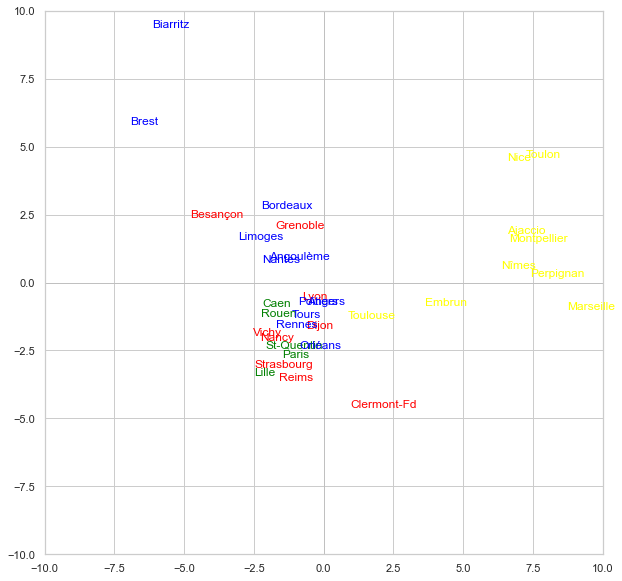

In [127]:
#Liste des couleurs
couleurs = ['red','green','blue', 'yellow']

#Faire un graphique en coloriant les points
fig, axes = plt.subplots(figsize=(10,10))
axes.set_xlim(-10,10)
axes.set_ylim(-10,10)

#Pour chaque modalité de la var. illustrative
for c in range(len(modalites)):
    #numéro des individus concernés
    numero = np.where(df3 == modalites[c])
    #les passer en revue pour affichage
    for i in numero[0]:
        plt.annotate(df.index[i],(coord[i,0],coord[i,1]),color=couleurs[c])

#Ajouter les axes
plt.plot([-10,10],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-10,10],color='silver',linestyle='-',linewidth=1)

Nous avons procédé représenté le nuage des individus en mettant en avant leur appartenance à un département.

### CONCLUSION

Nous avons ainsi réalisé une ACP pour faire une typologie des villes selon la pluviométrie. Au vue de nos résultats, nous avons retenu 4 groupes de villes et nous nous avons principalment mis l'accent sur le premier plan factoriel car il restitue plus de 79.9% de l'information globale. Par ailleurs, faisant face à un nombre important de variables, nous avons choisi des critères comme la corrélation aux axes et la qualité de représentation des variables pour retenir les varaibles les plus pertinentes à la formation des axes.